In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:

train_path = '../ELs_for_Rotate/Monarch_KG/train.txt'
valid_path = '../ELs_for_Rotate/Monarch_KG/valid.txt'
test_path = '../ELs_for_Rotate/Monarch_KG/test.txt'

# read each edge list in as a test of tuples
def load_triples(path):
    edges = set()
    with open(path, 'r') as f:
        for line in f:
            line = line.strip().split('\t')
            edges.add(tuple(line))
    return edges

train = load_triples(train_path)
valid = load_triples(valid_path)
test = load_triples(test_path)

train_og = train.copy()
valid_og = valid.copy()
test_og = test.copy()

valid = valid - train
test = test - train - valid

# get a list of entity types and relation types in a given set of triples
def get_types(triples):
    entities = set()
    relations = set()
    for triple in triples:
        entities.add(triple[0].split(':')[0])
        entities.add(triple[2].split(':')[0])
        relations.add(triple[1])
    return entities, relations



In [5]:
def count_triples_of_types(triples,prefix_a,prefix_b):
    count = 0
    for triple in triples:
        if triple[0].startswith(prefix_a) and triple[2].startswith(prefix_b) or triple[0].startswith(prefix_b) and triple[2].startswith(prefix_a):
            count += 1
    return count

# print the number of edges and the number of g2g and g2d edges in a given set of triples
def print_stats(triples):
    print('total: {}'.format(len(triples)))
    g2g = count_triples_of_types(triples,'HGNC:','HGNC:') 
    g2d = count_triples_of_types(triples,'HGNC:','MONDO:')
    print('g2g: {}'.format(g2g))
    print('g2d: {}'.format(g2d))

print('train')
print_stats(train)
print('valid')
print_stats(valid)
print('test')
print_stats(test)

train
total: 4162125
g2g: 489219
g2d: 5782
valid
total: 1025295
g2g: 1
g2d: 73
test
total: 2643568
g2g: 144755
g2d: 11991


In [4]:
test_entities, test_relations = get_types(test)
valid_entities, valid_relations = get_types(valid)
train_entities, train_relations = get_types(train)

entities = train_entities | valid_entities | test_entities
relations = train_relations | valid_relations | test_relations

print('Number of entities: {}'.format(len(entities)))
print('Number of relations: {}'.format(len(relations)))

Number of entities: 28
Number of relations: 60


[1, 1.0000175391176382, 1.0028809802684926]


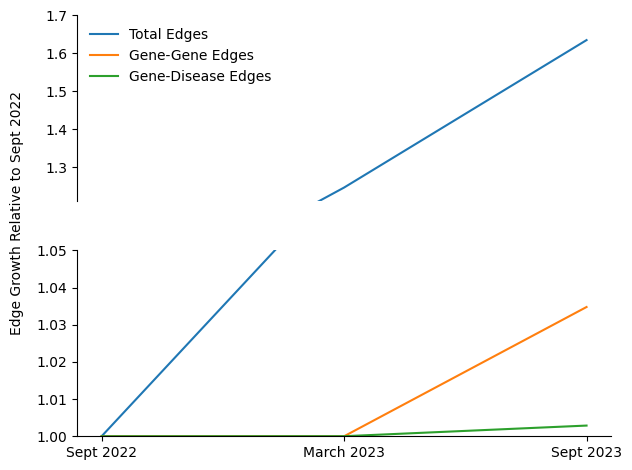

In [7]:

# count the number of edges added in validation and test
# count the number of nodes added in validation and test
groups = ("Sept 2022", "March 2023", "Sept 2023")

edges_proportional_increase = [1, 1 + (len(valid) / len(train)), 1 + (len(test) / len(train))]
g2g_increase = [1, 1 + (count_triples_of_types(valid,'HGNC:','HGNC:') / len(train)), 1 + (count_triples_of_types(test,'HGNC:','HGNC:') / len(train))]
g2d_increase = [1, 1 + (count_triples_of_types(valid,'HGNC:','MONDO:') / len(train)), 1 + (count_triples_of_types(test,'HGNC:','MONDO:') / len(train))]
print(g2d_increase)

fig, axes = plt.subplots(nrows=2, ncols=1)
axes[1].plot([0,1,2], [1,1.07,1.7], label='Total Edges')
axes[0].plot([0,1,2], [0.9] + edges_proportional_increase[1:], label='Total Edges')
axes[1].plot([0,1,2], g2g_increase, label='Gene-Gene Edges')
axes[1].plot([0,1,2], g2d_increase, label='Gene-Disease Edges')
axes[0].plot([0,1,2], g2g_increase, label='Gene-Gene Edges')
axes[0].plot([0,1,2], g2d_increase, label='Gene-Disease Edges')
# axes[1].set_xlabel('Time')
axes[1].set_ylabel('Edge Growth Relative to Sept 2022')
# change the location of the y label to move up
axes[1].yaxis.set_label_coords(-0.1,1.2)
# remove top and right borders
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[0].legend(frameon=False)

axes[0].set_ylim(1.21, 1.7)
axes[1].set_ylim(1, 1.05)
# label x ticks
axes[1].set_xticks([0,1,2])
axes[1].set_xticklabels(groups)
# hide axes[0] ticks
axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tight_layout()
plt.savefig('../Figures/monarch_edge_growth.png', dpi=300)
plt.show()
